In [1]:
import os
import xarray as xr
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
from windrose import WindroseAxes

repertoire_courant=os.getcwd()
repertoire_figures=repertoire_courant+r"\\"+r"figures"+r"\\"
print(repertoire_courant)
repertoire_fichiers=repertoire_courant+r"\Outputs_EddyPro"+r"\\"
print("chargement des données")

tmin=np.datetime64("2023-09-01 00:00:00")
tmax=np.datetime64("2023-09-08 08:00:00")

T2R_1_30min=xr.open_dataset(repertoire_fichiers+r"T2_RE_bas_30min_full_output.nc").sel(temps=slice(tmin,
                                                                                                     tmax))
T2R_2_30min=xr.open_dataset(repertoire_fichiers+r"T2_RE_haut_30min_full_output.nc").sel(temps=slice(tmin,
                                                                                                     tmax))
T2R_1_30min=xr.combine_by_coords([T2R_1_30min,
                                           xr.open_dataset(repertoire_fichiers+
                                                           r"T2_RE_bas_30min_spectres.nc").sel(temps=slice(tmin,
                                                                                                       tmax))],
                                          join='override').assign(wind_dir=(T2R_1_30min.wind_dir+180)%360)
T2R_2_30min=xr.combine_by_coords([T2R_2_30min,
                                           xr.open_dataset(repertoire_fichiers+
                                                           r"T2_RE_haut_30min_spectres.nc").sel(temps=slice(tmin,
                                                                                                     tmax))],
                                          join='override').assign(wind_dir=(T2R_1_30min.wind_dir+180)%360)


z_1_30min = np.array([1.2 if date < np.datetime64("2023-09-06 09:00:00") else 1.05
                        for date in T2R_1_30min.coords['temps'].values])
z_T2_1_30min=xr.DataArray(data=z_1_30min,
                         dims=['temps'],
                         coords={'temps':('temps',T2R_1_30min.coords['temps'].values)})
T2R_1_30min=T2R_1_30min.assign({'instrument_height':z_T2_1_30min})

z_2_30min = np.ones(T2R_2_30min.coords['temps'].values.size)*2.0
z_T2_2_30min=xr.DataArray(data=z_2_30min,
                         dims=['temps'],
                         coords={'temps':('temps',T2R_2_30min.coords['temps'].values)})
T2R_2_30min=T2R_2_30min.assign({'instrument_height':z_T2_2_30min})


T2_1_30min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_1_30min_full_output.nc").sel(temps=slice(tmin,
                                                                                                     tmax))
T2_1_30min=xr.combine_by_coords([T2_1_30min,
                                           xr.open_dataset(repertoire_fichiers+
                                                           r"T2_TO5_1_30min_spectres.nc").sel(temps=slice(tmin,
                                                                                                       tmax))],
                                          join='override').assign(wind_dir=(T2_1_30min.wind_dir+180)%360)



T2_2_30min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_2_30min_full_output.nc").sel(temps=slice(tmin,
                                                                                                     tmax))
T2_2_30min=xr.combine_by_coords([T2_2_30min,
                                           xr.open_dataset(repertoire_fichiers+
                                                           r"T2_TO5_2_30min_spectres.nc").sel(temps=slice(tmin,
                                                                                                       tmax))],
                                          join='override').assign(wind_dir=(T2_2_30min.wind_dir+180)%360)


T2_3_30min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_3_30min_full_output.nc").sel(temps=slice(tmin,
                                                                                                     tmax))
T2_3_30min=xr.combine_by_coords([T2_3_30min,
                                           xr.open_dataset(repertoire_fichiers+
                                                           r"T2_TO5_3_30min_spectres.nc").sel(temps=slice(tmin,
                                                                                                       tmax))],
                                          join='override')


T2L_1_30min=xr.open_dataset(repertoire_fichiers+r"T2_LW_bas_30min_full_output.nc").sel(temps=slice(tmin,
                                                                                                     tmax))
T2L_1_30min=xr.combine_by_coords([T2L_1_30min,
                                           xr.open_dataset(repertoire_fichiers+
                                                           r"T2_LW_bas_30min_spectres.nc").sel(temps=slice(tmin,
                                                                                                       tmax))],
                                          join='override')

T2L_2_30min=xr.open_dataset(repertoire_fichiers+r"T2_LW_haut_30min_full_output.nc").sel(temps=slice(tmin,
                                                                                                     tmax))
T2L_2_30min=xr.combine_by_coords([T2L_2_30min,
                                           xr.open_dataset(repertoire_fichiers+
                                                           r"T2_LW_haut_30min_spectres.nc").sel(temps=slice(tmin,
                                                                                                       tmax))],
                                          join='override')

z_T2L_2_30min=xr.DataArray(np.ones(T2L_2_30min.coords['temps'].values.size)*1.96,
                          dims=['temps'],
                          coords={'temps':('temps',T2L_2_30min.coords['temps'].values)})

T2L_2_30min=T2L_2_30min.assign(instrument_height=z_T2L_2_30min,wind_dir=(T2L_2_30min.wind_dir+180)%360)
T2L_1_30min=T2L_1_30min.assign(instrument_height=T2L_1_30min.instrument_height/100.0,wind_dir=(T2L_1_30min.wind_dir+180)%360)
print(T2R_1_30min)
print("fait")

C:\Users\evanl\Documents\Stage IGE
chargement des données
<xarray.Dataset>
Dimensions:                  (temps: 352, freq: 50)
Coordinates:
  * temps                    (temps) datetime64[ns] 2023-09-01T00:30:00 ... 2...
  * freq                     (freq) float64 0.0006104 nan nan ... 7.489 9.11
Data variables: (12/112)
    daytime                  (temps) int64 ...
    Tau                      (temps) float64 ...
    qc_Tau                   (temps) int64 ...
    H                        (temps) float64 ...
    qc_H                     (temps) int64 ...
    LE                       (temps) float64 ...
    ...                       ...
    f_Su                     (freq, temps) float64 ...
    f_Sv                     (freq, temps) float64 ...
    f_Sw                     (freq, temps) float64 ...
    f_Sts                    (freq, temps) float64 ...
    f_C_wts                  (freq, temps) float64 ...
    instrument_height        (temps) float64 1.2 1.2 1.2 1.2 ... 1.05 1.05 1.05


In [2]:
print("chargements fichiers flux 2min")
T2R_1_2min=xr.open_dataset(repertoire_fichiers+r"T2_RE_bas_2min_full_output.nc").sel(temps=slice(tmin,
                                                                                                     tmax))
T2R_2_2min=xr.open_dataset(repertoire_fichiers+r"T2_RE_haut_2min_full_output.nc").sel(temps=slice(tmin,
                                                                                                     tmax))
z_1_2min = np.array([1.2 if date < np.datetime64("2023-09-06 09:00:00") else 1.05
                        for date in T2R_1_2min.coords['temps'].values])
z_T2_1_2min=xr.DataArray(data=z_1_2min,
                         dims=['temps'],
                         coords={'temps':('temps',T2R_1_2min.coords['temps'].values)})
T2R_1_2min=T2R_1_2min.assign({'instrument_height':z_T2_1_2min})

z_2_2min = np.ones(T2R_2_2min.coords['temps'].values.size)*2.0
z_T2_2_2min=xr.DataArray(data=z_2_2min,
                         dims=['temps'],
                         coords={'temps':('temps',T2R_2_2min.coords['temps'].values)})
T2R_2_2min=T2R_2_2min.assign({'instrument_height':z_T2_2_2min})
T2_1_2min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_1_2min_full_output.nc").sel(temps=slice(tmin,
                                                                                                     tmax))
T2_2_2min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_2_2min_full_output.nc").sel(temps=slice(tmin,
                                                                                                     tmax))
T2_3_2min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_3_2min_full_output.nc").sel(temps=slice(tmin,
                                                                                                     tmax))
T2L_1_2min=xr.open_dataset(repertoire_fichiers+r"T2_LW_bas_2min_full_output.nc").sel(temps=slice(tmin,
                                                                                                     tmax))
T2L_2_2min=xr.open_dataset(repertoire_fichiers+r"T2_LW_haut_2min_full_output.nc").sel(temps=slice(tmin,
                                                                                                     tmax))
z_T2L_2_2min=xr.DataArray(np.ones(T2L_2_30min.coords['temps'].values.size)*1.96,
                          dims=['temps'],
                          coords={'temps':('temps',T2L_2_30min.coords['temps'].values)})

T2L_2_2min=T2L_2_2min.assign(instrument_height=z_T2L_2_2min,wind_dir=(T2L_2_2min.wind_dir+180)%360)
T2L_1_2min=T2L_1_2min.assign(instrument_height=T2L_1_2min.instrument_height/100.0,wind_dir=(T2L_1_2min.wind_dir+180)%360)
print(T2L_2_2min)
print("fait")

chargements fichiers flux 2min
<xarray.Dataset>
Dimensions:                  (temps: 5280)
Coordinates:
  * temps                    (temps) datetime64[ns] 2023-09-01T00:02:00 ... 2...
Data variables: (12/73)
    daytime                  (temps) float64 ...
    Tau                      (temps) float64 ...
    qc_Tau                   (temps) float64 ...
    H                        (temps) float64 ...
    qc_H                     (temps) float64 ...
    H_strg                   (temps) float64 ...
    ...                       ...
    v_mean                   (temps) float64 ...
    w_mean                   (temps) float64 ...
    ts_mean                  (temps) float64 ...
    instrument_height        (temps) float64 nan nan nan nan ... nan nan 1.96
    wu_cov                   (temps) float64 ...
    vw_cov                   (temps) float64 ...
fait


In [3]:
print(T2L_2_2min.coords['temps'].values.size %15)

0


In [4]:
print("moyennes flux 2min")
T2L_1_2min_moy=T2L_1_2min.coarsen(temps=15,side='left',boundary='pad').mean()
T2L_2_2min_moy=T2L_2_2min.coarsen(temps=15,side='left',boundary='pad').mean()

T2R_1_2min_moy=T2R_1_2min.coarsen(temps=15,side='left',boundary='pad').mean()
T2R_2_2min_moy=T2R_2_2min.coarsen(temps=15,side='left',boundary='pad').mean()

T2_1_2min_moy=T2_1_2min.coarsen(temps=15,side='left',boundary='pad').mean()
T2_2_2min_moy=T2_2_2min.coarsen(temps=15,side='left',boundary='pad').mean()
T2_3_2min_moy=T2_3_2min.coarsen(temps=15,side='left',boundary='pad').mean()
print("fait")

moyennes flux 2min
fait


In [5]:
print(T2L_1_2min_moy)

<xarray.Dataset>
Dimensions:                  (temps: 352)
Coordinates:
  * temps                    (temps) datetime64[ns] 2023-09-01T00:16:00 ... 2...
Data variables: (12/73)
    daytime                  (temps) float64 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0
    Tau                      (temps) float64 -0.1245 -0.03241 ... -0.01781
    qc_Tau                   (temps) float64 2.0 2.0 2.0 2.0 ... 2.0 1.933 2.0
    H                        (temps) float64 -31.2 -30.87 ... -21.47 -38.18
    qc_H                     (temps) float64 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
    H_strg                   (temps) float64 54.39 16.98 -51.1 ... -13.3 36.98
    ...                       ...
    v_mean                   (temps) float64 -1.156 2.863 ... 3.269 3.912
    w_mean                   (temps) float64 0.193 -0.3958 ... -0.3208 -0.3364
    ts_mean                  (temps) float64 277.3 277.9 277.9 ... 280.9 280.5
    instrument_height        (temps) float64 1.1 1.1 1.1 1.1 ... 1.14 1.14 1.14
    wu_cov

In [6]:
print(T2_1_30min['instrument_height'].values)
print(T2R_1_30min['instrument_height'].values)
print(T2L_1_30min['instrument_height'].values)

print(T2_2_30min['instrument_height'].values)
print(T2R_2_30min['instrument_height'].values)
print(T2L_2_30min['instrument_height'].values)

[1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03
 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03
 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03
 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03
 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03
 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03
 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03
 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03
 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03
 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03
 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03
 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03
 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03
 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03 1.03
 1.03 

In [7]:
print(xr.open_dataset(repertoire_fichiers+r"T2_TO5_2_2min_full_output.nc").coords['temps'].values)
print(xr.open_dataset(repertoire_fichiers+r"T2_TO5_2_2min_spectres.nc").coords['temps'].values)

['2023-09-01T00:02:00.000000000' '2023-09-01T00:04:00.000000000'
 '2023-09-01T00:06:00.000000000' ... '2023-09-08T11:56:00.000000000'
 '2023-09-08T11:58:00.000000000' '2023-09-08T12:00:00.000000000']
['2023-09-01T00:02:00.000000000' '2023-09-01T00:04:00.000000000'
 '2023-09-01T00:06:00.000000000' ... '2023-09-08T11:56:00.000000000'
 '2023-09-08T11:58:00.000000000' '2023-09-08T12:00:00.000000000']


In [8]:
def slope_1(x,axis=None,**kwargs):
    x_range=np.linspace(np.min(x),np.max(x),x.size)
    if isinstance(x,mpl.axes.Axes):
        axis.plot(x_range,x_range,**kwargs)
    else:
        plt.plot(x_range,x_range,**kwargs)

def R_2(model,data):
    #retourne le coef. de correlation R^2
    masque= np.array(np.isnan(model) | np.isnan(data))#on enlève les NaN
    new_model=np.ma.array(model,mask=masque).compressed()
    new_data=np.ma.array(data,mask=masque).compressed()
    return scipy.stats.linregress(new_model,new_data).rvalue**2

def MBE(model,data):
    #return np.mean(np.abs(model-data))
    return np.mean(model-data)

def MSE(model,data):
    return np.mean((data-model)**2)

def RMSE(model,data):
    return np.sqrt(MSE(data,model))

E_Melt=lambda x : 24.0*3600.0*x/(900.0*334.0e3)

niveau 1
MBE H T2R-T2 3.5402802818181813 W/m^2
MBE H T2R-T2 0.001017565589983669 m/jour
RMSE H T2R-T2 21.82632985150189 W/m^2
RMSE H T2R-T2 0.006273436124982578 m/jour
MBE H T2L-T2 -12.100991517045456 W/m^2
MBE H T2L-T2 -0.0034781292983124663 m/jour
RMSE H T2L-T2 22.652801586262207 W/m^2
RMSE H T2L-T2 0.006510984887069377 m/jour
MBE H T2L-T2R 15.641271798863635 W/m^2
MBE H T2L-T2R 0.004495694888296134 m/jour
RMSE H T2L-T2R 25.999150447573374 W/m^2
RMSE H T2L-T2R 0.007472809709482168 m/jour


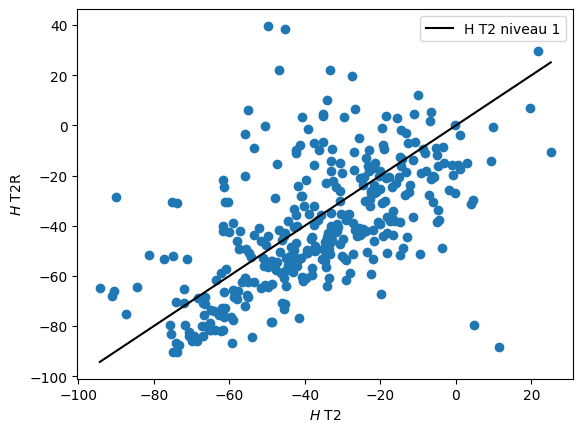

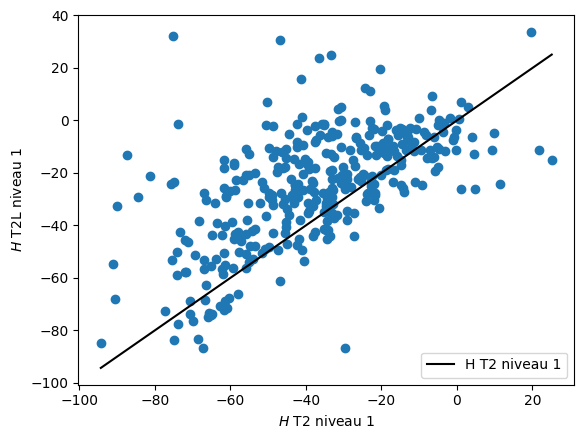

In [9]:
print("niveau 1")
print(f"MBE H T2R-T2 {MBE(T2_1_30min['H'].values,T2R_1_30min['H'].values)} W/m^2")
print(f"MBE H T2R-T2 {E_Melt(MBE(T2_1_30min['H'].values,T2R_1_30min['H'].values))} m/jour")
print(f"RMSE H T2R-T2 {RMSE(T2_1_30min['H'].values,T2R_1_30min['H'].values)} W/m^2")
print(f"RMSE H T2R-T2 {E_Melt(RMSE(T2_1_30min['H'].values,T2R_1_30min['H'].values))} m/jour")


print(f"MBE H T2L-T2 {MBE(T2_1_30min['H'].values,T2L_1_30min['H'].values)} W/m^2")
print(f"MBE H T2L-T2 {E_Melt(MBE(T2_1_30min['H'].values,T2L_1_30min['H'].values))} m/jour")
print(f"RMSE H T2L-T2 {RMSE(T2_1_30min['H'].values,T2L_1_30min['H'].values)} W/m^2")
print(f"RMSE H T2L-T2 {E_Melt(RMSE(T2_1_30min['H'].values,T2L_1_30min['H'].values))} m/jour")

print(f"MBE H T2L-T2R {MBE(T2L_1_30min['H'].values,T2R_1_30min['H'].values)} W/m^2")
print(f"MBE H T2L-T2R {E_Melt(MBE(T2L_1_30min['H'].values,T2R_1_30min['H'].values))} m/jour")
print(f"RMSE H T2L-T2R {RMSE(T2L_1_30min['H'].values,T2R_1_30min['H'].values)} W/m^2")
print(f"RMSE H T2L-T2R {E_Melt(RMSE(T2L_1_30min['H'].values,T2R_1_30min['H'].values))} m/jour")


fig=plt.figure()
plt.scatter(T2_1_30min['H'].values,T2R_1_30min['H'].values)
slope_1(T2_1_30min['H'].values,color='k',label='H T2 niveau 1')
plt.xlabel(r"$H$ T2")
plt.ylabel(r"$H$ T2R")
plt.legend()

fig=plt.figure()
plt.scatter(T2_1_30min['H'].values,T2L_1_30min['H'].values)
slope_1(T2_1_30min['H'].values,color='k',label='H T2 niveau 1')
plt.xlabel(r"$H$ T2 niveau 1")
plt.ylabel(r"$H$ T2L niveau 1")
plt.legend()


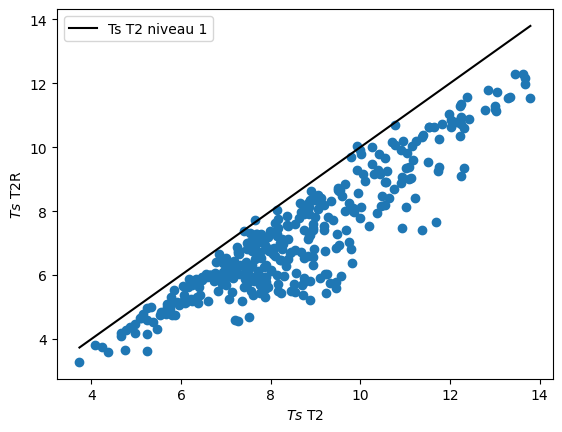

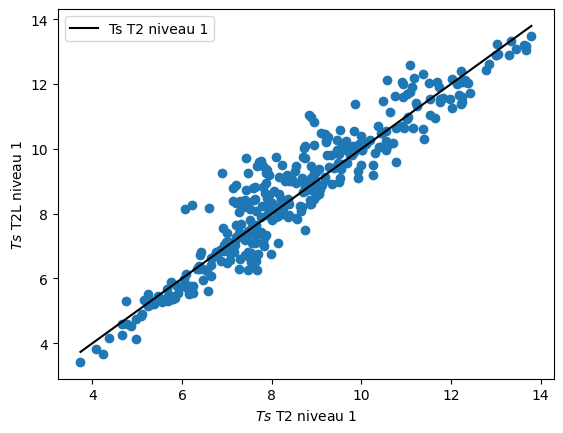

In [10]:

fig=plt.figure()
plt.scatter(T2_1_30min['ts_mean'].values-273.15,T2R_1_30min['ts_mean'].values-273.15)
slope_1(T2_1_30min['ts_mean'].values-273.15,color='k',label='Ts T2 niveau 1')
plt.xlabel(r"$Ts$ T2")
plt.ylabel(r"$Ts$ T2R")
plt.legend()

fig=plt.figure()
plt.scatter(T2_1_30min['ts_mean'].values-273.15,T2L_1_30min['ts_mean'].values-273.15)
slope_1(T2_1_30min['ts_mean'].values-273.15,color='k',label='Ts T2 niveau 1')
plt.xlabel(r"$Ts$ T2 niveau 1")
plt.ylabel(r"$Ts$ T2L niveau 1")
plt.legend()

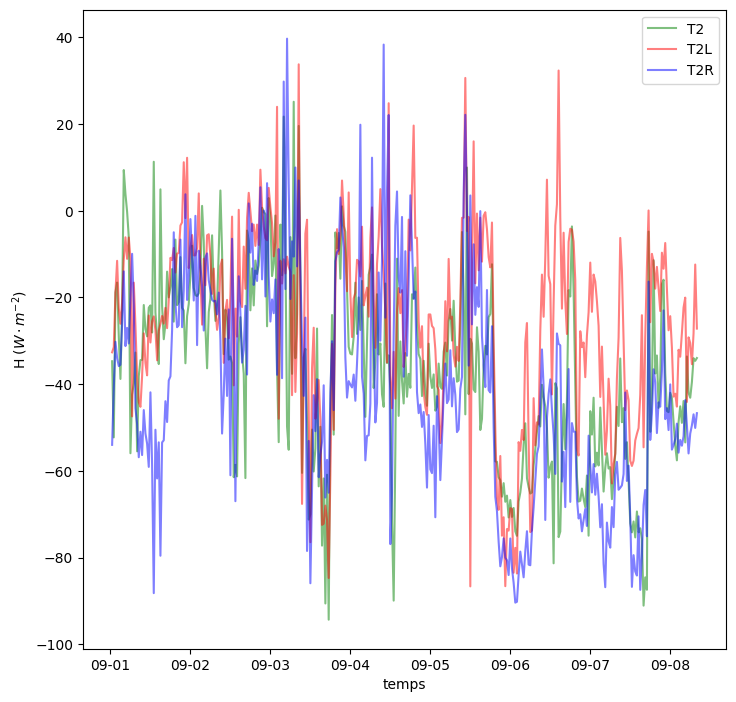

In [11]:
fig=plt.figure(figsize=(8.3,8.3))
date_format=mpl.dates.DateFormatter("%m-%d")
ax = fig.add_subplot(111)
tps=T2_1_30min.coords['temps'].values
ax.plot(tps,T2_1_30min['H'].values,color='g',label='T2',alpha=0.5)
ax.plot(tps,T2L_1_30min['H'].values,color='r',label='T2L',alpha=0.5)
ax.plot(tps,T2R_1_30min['H'].values,color='b',label='T2R',alpha=0.5)
ax.set_xlabel("temps")
ax.set_ylabel(r"H ($W\cdot m^{-2}$)")
ax.xaxis.set_major_formatter(date_format)
ax.legend()
plt.savefig(repertoire_figures+"H_all.png")

In [12]:
#Variabilité transverse du vent catabatique. On se base sur deux niveaux
#On se place dans une période où le vent souffle dans la direction de la pente 
# de facon continue
T2R_1_trunc=T2R_1_30min#.sel(temps=slice(np.datetime64("2023-09-06 00:00:00"),np.datetime64("2023-09-08 00:00:00")))
T2R_2_trunc=T2R_2_30min#.sel(temps=slice(np.datetime64("2023-09-06 00:00:00"),np.datetime64("2023-09-08 00:00:00")))

T2_1_trunc=T2_1_30min#.sel(temps=slice(np.datetime64("2023-09-06 00:00:00"),np.datetime64("2023-09-08 00:00:00")))
T2_2_trunc=T2_2_30min#.sel(temps=slice(np.datetime64("2023-09-06 00:00:00"),np.datetime64("2023-09-08 00:00:00")))

T2L_1_trunc=T2L_1_30min#.sel(temps=slice(np.datetime64("2023-09-06 00:00:00"),np.datetime64("2023-09-08 00:00:00")))
T2L_2_trunc=T2L_2_30min#.sel(temps=slice(np.datetime64("2023-09-06 00:00:00"),np.datetime64("2023-09-08 00:00:00")))


def detection_catabatique(level_1,level_2,mode='uw',WDIR_slope=200,sector=30,drop=False):
    "detecte changement de signe de <uw> (Grachev 2016)"
    #marche uniquement pour une hauteur supérieure à celle du niveau 1, et inférieure à celle du niveau 2
    #ne prend pas en compte le changement de signe de <uT>, car on l'a pas
    uw_level_1=level_1['wu_cov']#.values
    uw_level_2=level_2['wu_cov']#.values
    WDIR_1=level_1['wind_dir']
    #masque_uw= ((np.sign(uw_level_1) != np.sign(uw_level_2)) | (np.sign(uw_level_2) != np.sign(uw_level_3)))
    #masque_signe_uw = (((uw_level_1 < 0) | (uw_level_2 < 0)) & (uw_level_3 > 0)) | (((uw_level_3 > 0)|(uw_level_2 > 0)) & (uw_level_1 < 0))
    masque_signe_uw = (uw_level_2 > 0) & (uw_level_1 < 0)
    masque_variation_uw=(uw_level_1 < uw_level_2)
    masque_uw=masque_signe_uw# & masque_variation_uw
    masque_wind_dir=(WDIR_1 >= (WDIR_slope-sector)) & (WDIR_1 <= (WDIR_slope+sector))
    if mode=='uw':
        return level_1.where(masque_uw,drop=drop),level_2.where(masque_uw,drop=drop)
    elif mode=='WDIR':
        return level_1.where(masque_wind_dir,drop=drop),level_2.where(masque_wind_dir,drop=drop)
    elif mode =='all':
        masque_all=masque_uw & masque_wind_dir
        return level_1.where(masque_all,drop=drop),level_2.where(masque_all,drop=drop)
    else:
        raise ValueError(f"mode={mode}, valeurs possibles 'uw','WDIR',all")

def zero_droite(x1,x2,y1,y2):
    a=(y2-y1)/(x2-x1)
    b1=y1-a*x1
    b2=y2-a*x2
    b_moy=(b1+b2)/2.0
    return -b_moy/a
def max_interp_lin(x1,x2,y1,y2):
    if np.sign(y1) != np.sign(y2):
        return zero_droite(x1,x2,y1,y2)
    else:
        return np.NaN
    
def max_catabatique(level_1,level_2):
    uw_level_1=level_1['wu_cov'].values
    uw_level_2=level_2['wu_cov'].values
    z_level_1=level_1['instrument_height'].values
    z_level_2=level_2['instrument_height'].values
    N_ech=uw_level_1.size
    z_max=np.ones(N_ech)
    for i in range(0,N_ech):
        z_max_i=max_interp_lin(z_level_1[i],
                             z_level_2[i],
                             uw_level_1[i],
                             uw_level_2[i])
        #print(f"i {i}")
        #print(f"z1 {z_level_1[i]}")
        #print(f"z2 {z_level_2[i]}")
        #print(f"uw 1 {uw_level_1[i]}")
        #print(f"uw 2 {uw_level_2[i]}")
        #print(f"z_max {z_max_i}")
        if (z_max_i < z_level_1[i]):
            z_max_i=np.NaN
        else:
            z_max[i]=z_max_i
    return xr.Dataset({'z_max':('temps',z_max)},coords=level_1.coords)

N_nan=lambda x:np.sum(np.where(np.isnan(x), 1, 0))
N_detecte=lambda x : x.size-N_nan(x)
flag_wu_neg=lambda x,y:(x['wu_cov'] < 0) & (y['wu_cov'] < 0)
flag_wu_pos=lambda x,y:(x['wu_cov'] > 0) & (y['wu_cov'] > 0)
N_wu_neg=lambda x,y: x.where(flag_wu_neg(x,y),drop=True).coords['temps'].values.size
N_wu_pos=lambda x,y: x.where(flag_wu_pos(x,y),drop=True).coords['temps'].values.size

T2R_1_K,T2R_2_K=detection_catabatique(T2R_1_trunc,
                                      T2R_2_trunc,drop=False)

T2_1_K,T2_2_K=detection_catabatique(T2_1_trunc,
                                    T2_2_trunc,drop=False)

T2L_1_K,T2L_2_K=detection_catabatique(T2L_1_trunc,
                                      T2L_2_trunc,drop=False)
print(T2R_1_K)
print(T2_1_K)
print(T2L_1_K)

zmax_T2R=max_catabatique(T2R_1_K,T2R_2_K)
zmax_T2=max_catabatique(T2_1_K,T2_2_K)
zmax_T2L=max_catabatique(T2L_1_K,T2L_2_K)
print(f"T2R : nombre max vent detecte:{N_detecte(zmax_T2R['z_max'].values)}sur {T2R_1_K.coords['temps'].values.size}, soit {100.0*N_detecte(zmax_T2R['z_max'].values)/T2R_1_K.coords['temps'].values.size} %")
print(f"T2R : nombre de profils avec <uw> negatif {N_wu_neg(T2R_1_trunc,T2R_2_trunc)} sur {T2R_1_trunc.coords['temps'].values.size}, soit {100*N_wu_neg(T2R_1_trunc,T2R_2_trunc)/T2R_1_trunc.coords['temps'].values.size} %") 
print(f"T2R : nombre de profils avec <uw> positif {N_wu_pos(T2R_1_trunc,T2R_2_trunc)} sur {T2R_1_trunc.coords['temps'].values.size}, soit {100*N_wu_pos(T2R_1_trunc,T2R_2_trunc)/T2R_1_trunc.coords['temps'].values.size} %") 
print(f"T2 : nombre max vent detecte:{N_detecte(zmax_T2['z_max'].values)} sur {T2_1_K.coords['temps'].values.size}, soit {100.0*N_detecte(zmax_T2['z_max'].values)/T2_1_K.coords['temps'].values.size} %")
print(f"T2L : nombre max vent detecte:{N_detecte(zmax_T2L['z_max'].values)} sur {T2L_1_K.coords['temps'].values.size}, soit {100.0*N_detecte(zmax_T2L['z_max'].values)/T2L_1_K.coords['temps'].values.size} %")


<xarray.Dataset>
Dimensions:                  (temps: 352, freq: 50)
Coordinates:
  * temps                    (temps) datetime64[ns] 2023-09-01T00:30:00 ... 2...
  * freq                     (freq) float64 0.0006104 nan nan ... 7.489 9.11
Data variables: (12/112)
    daytime                  (temps) float64 0.0 nan nan nan ... nan nan nan nan
    Tau                      (temps) float64 -0.1611 nan nan nan ... nan nan nan
    qc_Tau                   (temps) float64 2.0 nan nan nan ... nan nan nan nan
    H                        (temps) float64 -54.0 nan nan nan ... nan nan nan
    qc_H                     (temps) float64 2.0 nan nan nan ... nan nan nan nan
    LE                       (temps) float64 112.0 nan nan nan ... nan nan nan
    ...                       ...
    f_Su                     (freq, temps) float64 0.03649 nan nan ... nan nan
    f_Sv                     (freq, temps) float64 0.443 nan nan ... nan nan nan
    f_Sw                     (freq, temps) float64 0.003094

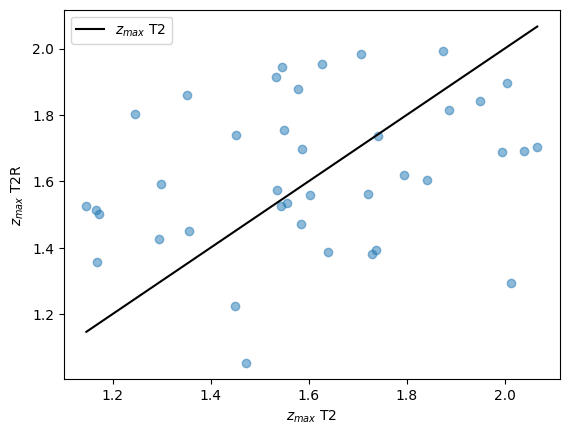

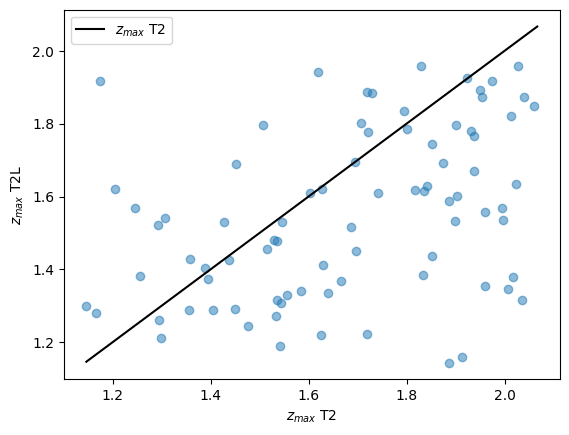

In [13]:
fig=plt.figure()
plt.scatter(zmax_T2['z_max'].values,zmax_T2R['z_max'].values,alpha=0.5)
z_max_not_nan=zmax_T2.where(~np.isnan(zmax_T2['z_max']),drop=True)['z_max'].values
slope_1(zmax_T2['z_max'],color='k',label=r'$z_{max}$ T2')
plt.xlabel(r'$z_{max}$ T2')
plt.ylabel(r'$z_{max}$ T2R')
plt.legend()

fig=plt.figure()
plt.scatter(zmax_T2['z_max'].values,zmax_T2L['z_max'].values,alpha=0.5)
z_max_not_nan=zmax_T2.where(~np.isnan(zmax_T2['z_max']),drop=True)['z_max'].values
slope_1(zmax_T2['z_max'],color='k',label=r'$z_{max}$ T2')
plt.xlabel(r'$z_{max}$ T2')
plt.ylabel(r'$z_{max}$ T2L')
plt.legend()

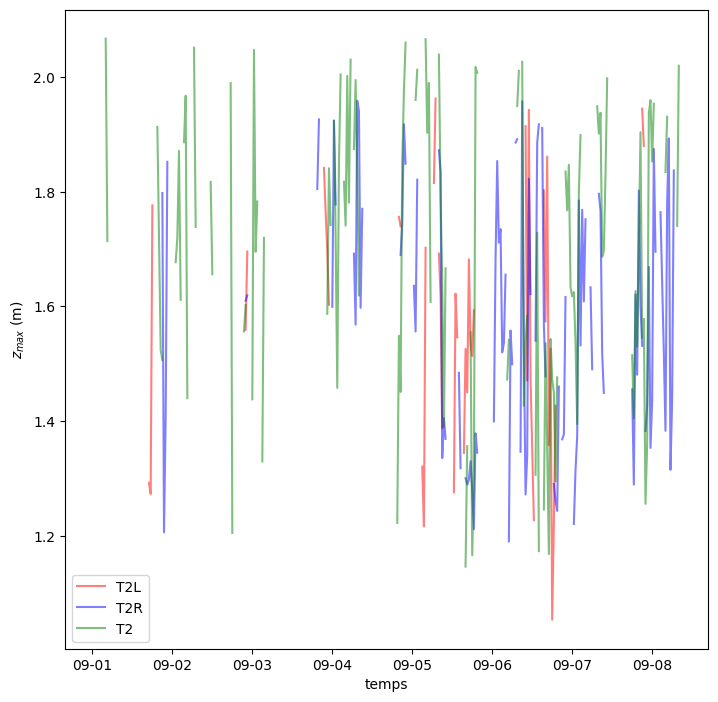

In [14]:
#date_format=mpl.dates.DateFormatter("%H-%M")
date_format=mpl.dates.DateFormatter("%m-%d")
fig=plt.figure(figsize=(8.3,8.3))
ax=fig.add_subplot(111)
ax.plot(zmax_T2.coords['temps'].values,zmax_T2R['z_max'].values,
         color='r',label='T2L',alpha=0.5)
ax.plot(zmax_T2.coords['temps'].values,zmax_T2L['z_max'].values,
         color='b',label='T2R',alpha=0.5)
ax.plot(zmax_T2.coords['temps'].values,zmax_T2['z_max'].values,
         color='g',label='T2',alpha=0.5)
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel("temps")
ax.set_ylabel(r"$z_{max}$ (m)")
ax.legend()
plt.savefig(repertoire_figures+"evolution_zmax_all_towers")

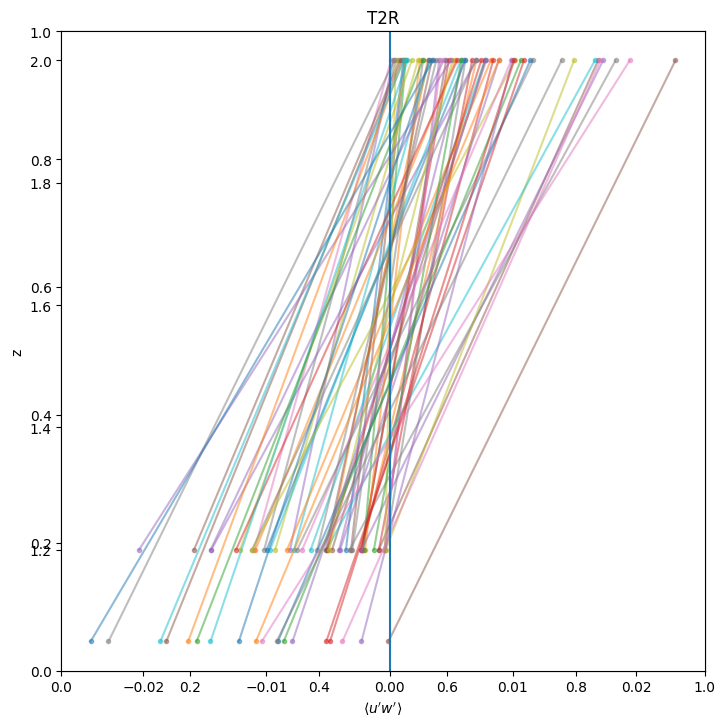

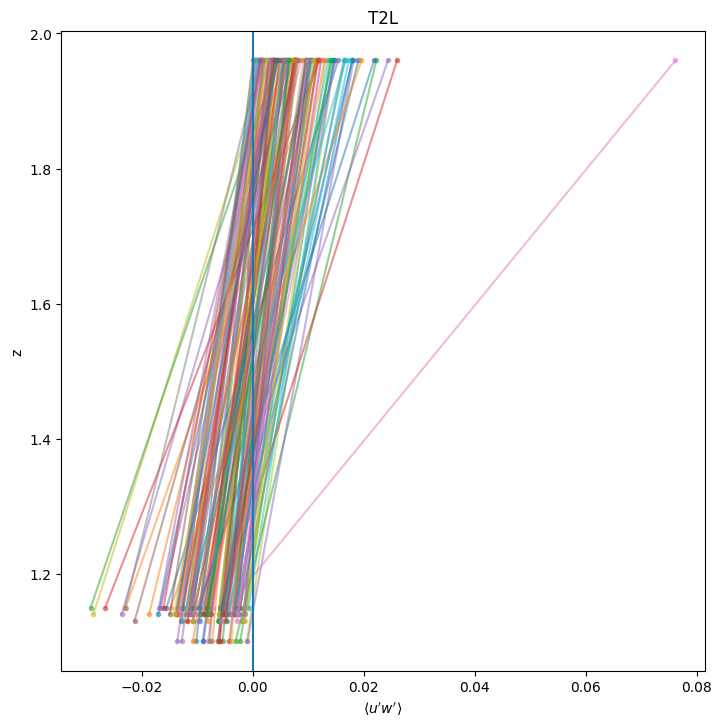

In [15]:
fig=plt.figure(figsize=(8.3,8.3))
plt.title("T2R")
ax1=fig.add_subplot(111)
for i in range(0,T2R_1_K.coords['temps'].size):
    plt.plot([T2R_1_K['wu_cov'].values[i],
              T2R_2_K['wu_cov'].values[i]],
             [T2R_1_K['instrument_height'].values[i],
              T2R_2_K['instrument_height'].values[i]],alpha=0.5,marker='.')
plt.xlabel(r"$\langle u'w' \rangle$")
plt.ylabel('z')
plt.axvline(0)
plt.savefig(repertoire_figures+"profil_uw_T2R.png")

fig=plt.figure(figsize=(8.3,8.3))
plt.title("T2L")
for i in range(0,T2R_1_K.coords['temps'].size):
    plt.plot([T2L_1_K['wu_cov'].values[i],
              T2L_2_K['wu_cov'].values[i]],
             [T2L_1_K['instrument_height'].values[i],
              T2L_2_K['instrument_height'].values[i]],alpha=0.5,marker='.')
plt.xlabel(r"$\langle u'w' \rangle$")
plt.ylabel('z')
plt.axvline(0)
plt.savefig(repertoire_figures+"profil_uw_T2L.png")


Text(0.5, 0, '$z_{max}$ T2R (m)')

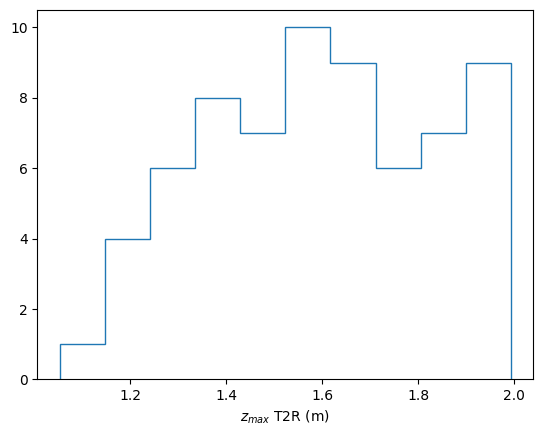

In [16]:
fig=plt.figure()
plt.hist(zmax_T2R['z_max'].values,histtype='step')
plt.xlabel(r"$z_{max}$ T2R (m)")

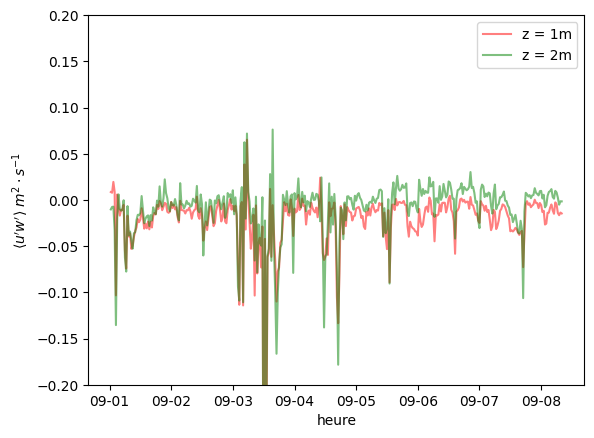

In [17]:
date_format=mpl.dates.DateFormatter("%m-%d")
#date_format=mpl.dates.DateFormatter("%H-%M")
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(T2L_1_30min.coords['temps'].values,T2L_1_30min['wu_cov'].values,
         color='r',label='z = 1m',alpha=0.5)
ax.plot(T2L_2_30min.coords['temps'].values,T2L_2_30min['wu_cov'].values,
         color='g',label='z = 2m',alpha=0.5)
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel("heure")
ax.set_ylabel(r"$\langle u'w' \rangle$ $m^2 \cdot s^{-1}$")
ax.set_ylim(-0.2,0.2)
ax.legend()

C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees

axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None


C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees

axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None
axis = None


C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees

axis = None
axis = None
axis = None
axis = None
axis = None
axis = None


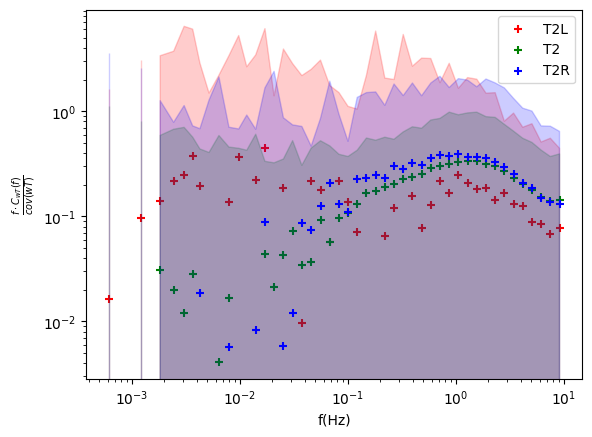

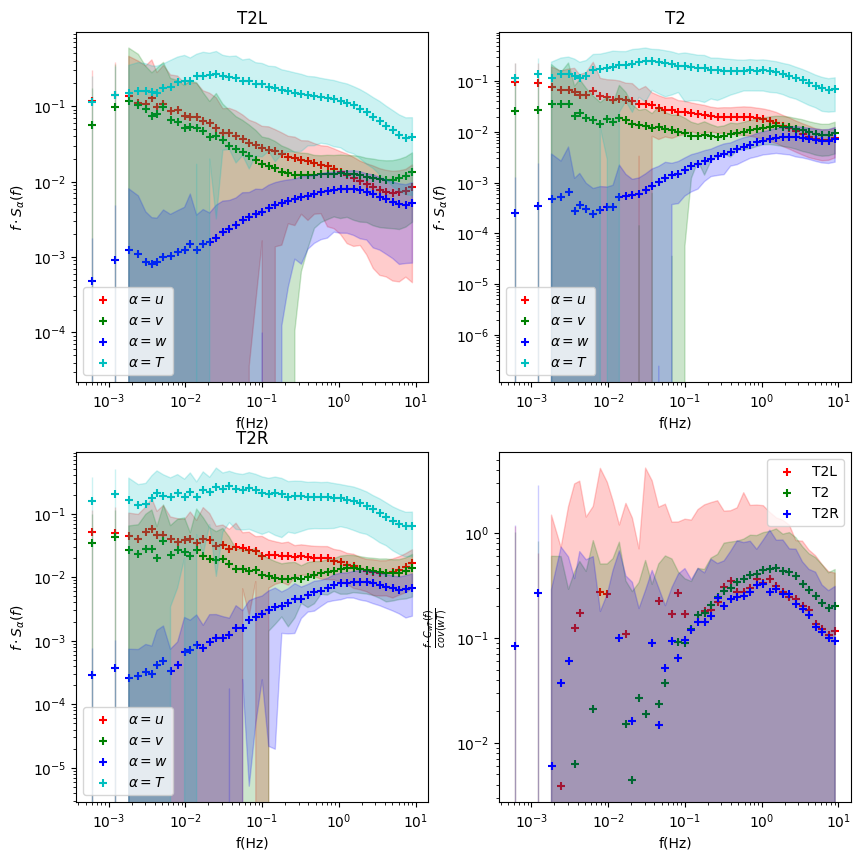

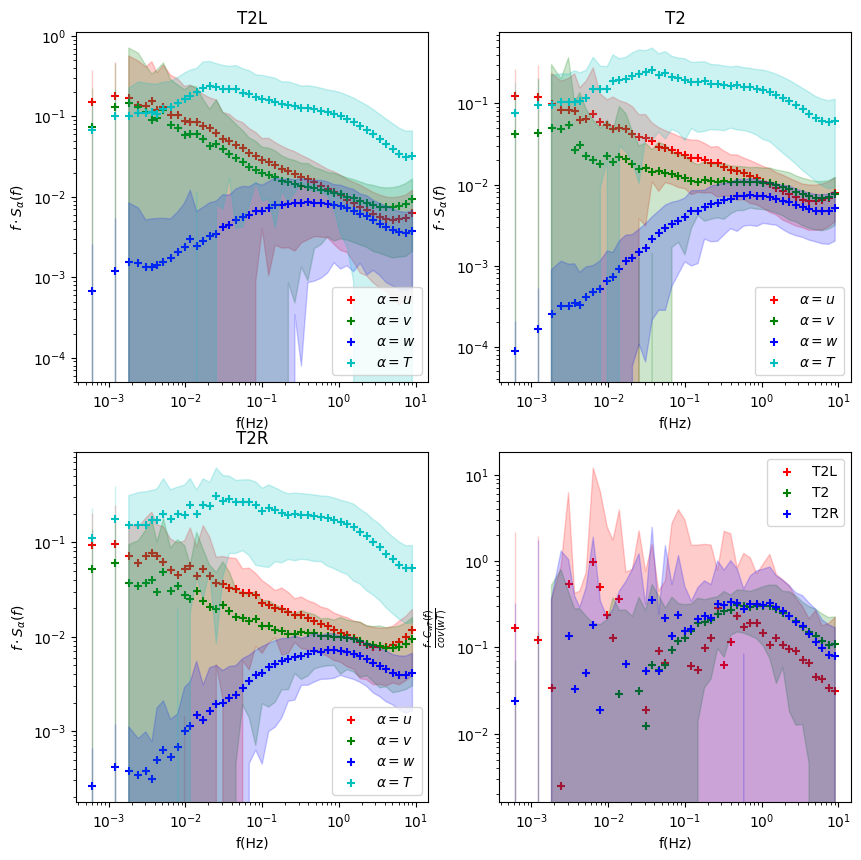

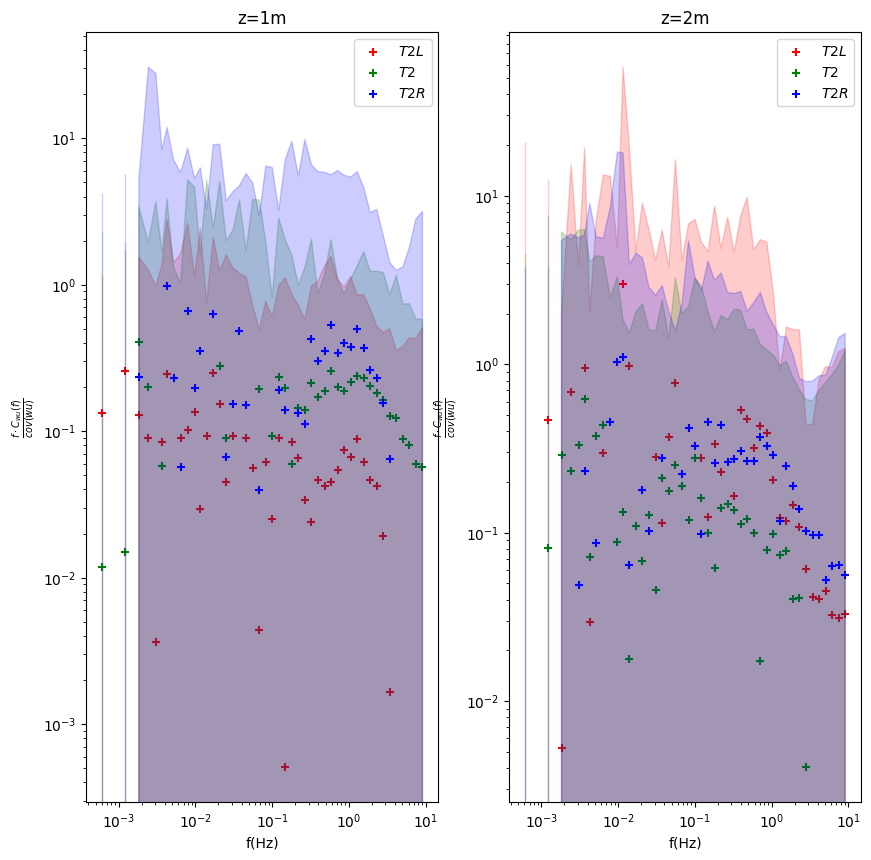

In [18]:
def plot_spectre(Da,axis=None, xscale='log',yscale='log',**kwargs):
    "trace un spectre moyenné avec l'écart type. Plagié sur le notebook Stabilite_T2_TO5-V3"
    Da_moy=Da.mean('temps')
    Da_std=Da.std('temps')
    freq=Da_moy.coords['freq'].values
    print(f"axis = {axis}")
    #plt.plot(freq,Da_moy.values,**kwargs)
    if isinstance(axis,mpl.axes.Axes)  :
        axis.scatter(freq,Da_moy.values,marker='+',**kwargs)
        axis.fill_between(freq,
                          Da_moy.values-Da_std.values,
                          Da_moy.values+Da_std.values,alpha=0.2,color=kwargs['color'])
        axis.set_xscale(xscale)
        axis.set_yscale(yscale)
    else:
        plt.scatter(freq,Da_moy.values,marker='+',**kwargs)
        plt.fill_between(freq,
                         Da_moy.values-Da_std.values,
                         Da_moy.values+Da_std.values,alpha=0.2,color=kwargs['color'])
        plt.xscale(xscale)
        plt.yscale(yscale)
def Kansas_spectra(f,S_alpha,A=0.164,freq_min=1.0,freq_max=10.0):
    flag_freq=(f>= freq_min)&(f<=freq_max)
    plage_spectre=S_alpha[flag_freq]
    plage_freq=f[flag_freq]
    S_inertiel=lambda x, a:a*x**(-2.0/3.0)
    x_fit=scipy.optimize.curve_fit(S_inertiel,plage_freq,plage_spectre,nan_policy='omit')[0]
    f_0=x_fit**(3.0/2.0)
    f_norm=f/f_0
    S_alpha_ref=A*f_norm/(1.0+A*(f_norm**(5.0/3.0)))
    return S_alpha_ref

def plot_Kansas_spectra(Da,color=None,label=None,linestyle='-.',**kwargs):
    f=Da.coords['freq'].values
    spectra=Kansas_spectra(f,Da.values,**kwargs)
    plt.plot(f,spectra,color=color,label=label,linestyle=linestyle)

def plot_Kansas_cospectra(Da,color=None,label=None,linestyle='-.',**kwargs):
    f=Da.coords['freq'].values
    spectra=Kansas_cospectra(f,Da.values,**kwargs)
    plt.plot(f,spectra,color=color,label=label,linestyle=linestyle)


def Kansas_cospectra(f,C_alpha,B=0.88,C=1.5,freq_min=1.0,freq_max=10.0):
    flag_freq=(f>= freq_min)&(f<=freq_max)
    plage_spectre=C_alpha[flag_freq]
    plage_freq=f[flag_freq]
    C_inertiel=lambda x, a: a*x**(-2.1)
    x_fit=scipy.optimize.curve_fit(C_inertiel,plage_freq,plage_spectre,nan_policy='omit')[0]
    f_0=x_fit**(3.0/2.0)
    f_norm=f/f_0
    C_alpha_fit=B*f_norm/(1.0+C*(f_norm**2.1))
    return C_alpha_fit
fig=plt.figure()
plot_spectre(T2L_1_30min['f_C_wts_norm'], color='r',label='T2L')
plot_spectre(T2_1_30min['f_C_wts_norm'], color='g',label='T2')
plot_spectre(T2R_1_30min['f_C_wts_norm'], color='b',label='T2R')
plt.xlabel('f(Hz)')
plt.ylabel(r"$\frac{f\cdot C_{wT}(f)}{cov(wT)}$")
plt.legend()

fig=plt.figure(figsize=(10,10))

ax1=fig.add_subplot(221)
plt.title('T2L')
plot_spectre(T2L_1_30min['f_Su'], color='r',label=r'$\alpha=u$')
plot_spectre(T2L_1_30min['f_Sv'], color='g',label=r'$\alpha=v$')
plot_spectre(T2L_1_30min['f_Sw'], color='b',label=r'$\alpha=w$')
plot_spectre(T2L_1_30min['f_Sts'], color='c',label=r'$\alpha=T$')
plt.xlabel('f(Hz)')
plt.ylabel(r"$f\cdot S_\alpha(f)$")
plt.legend()

ax2=fig.add_subplot(222)
plt.title('T2')
plot_spectre(T2_1_K['f_Su'], color='r',label=r'$\alpha=u$')
plot_spectre(T2_1_K['f_Sv'], color='g',label=r'$\alpha=v$')
plot_spectre(T2_1_K['f_Sw'], color='b',label=r'$\alpha=w$')
plot_spectre(T2_1_K['f_Sts'], color='c',label=r'$\alpha=T$')
plt.xlabel('f(Hz)')
plt.ylabel(r"$f\cdot S_\alpha(f)$")
plt.legend()


ax3=fig.add_subplot(223)
plt.title('T2R')
plot_spectre(T2R_1_K['f_Su'], color='r',label=r'$\alpha=u$')
plot_spectre(T2R_1_K['f_Sv'], color='g',label=r'$\alpha=v$')
plot_spectre(T2R_1_K['f_Sw'], color='b',label=r'$\alpha=w$')
plot_spectre(T2R_1_K['f_Sts'], color='c',label=r'$\alpha=T$')
plt.xlabel('f(Hz)')
plt.ylabel(r"$f\cdot S_\alpha(f)$")
plt.legend()

ax4=fig.add_subplot(224)
plot_spectre(T2L_1_K['f_C_wts_norm'], color='r',label='T2L')
plot_spectre(T2_1_K['f_C_wts_norm'], color='g',label='T2')
plot_spectre(T2R_1_K['f_C_wts_norm'], color='b',label='T2R')
plt.xlabel('f(Hz)')
plt.ylabel(r"$\frac{f\cdot C_{wT}(f)}{cov(wT)}$")
plt.legend()

plt.savefig(repertoire_figures+"spectres_tower_1.png")

fig=plt.figure(figsize=(10,10))

ax1=fig.add_subplot(221)
plt.title('T2L')
plot_spectre(T2L_2_30min['f_Su'], color='r',label=r'$\alpha=u$')
plot_spectre(T2L_2_30min['f_Sv'], color='g',label=r'$\alpha=v$')
plot_spectre(T2L_2_30min['f_Sw'], color='b',label=r'$\alpha=w$')
plot_spectre(T2L_2_30min['f_Sts'], color='c',label=r'$\alpha=T$')
plt.xlabel('f(Hz)')
plt.ylabel(r"$f\cdot S_\alpha(f)$")
plt.legend()

ax2=fig.add_subplot(222)
plt.title('T2')
plot_spectre(T2_2_K['f_Su'], color='r',label=r'$\alpha=u$')
plot_spectre(T2_2_K['f_Sv'], color='g',label=r'$\alpha=v$')
plot_spectre(T2_2_K['f_Sw'], color='b',label=r'$\alpha=w$')
plot_spectre(T2_2_K['f_Sts'], color='c',label=r'$\alpha=T$')
plt.xlabel('f(Hz)')
plt.ylabel(r"$f\cdot S_\alpha(f)$")
plt.legend()


ax3=fig.add_subplot(223)
plt.title('T2R')
plot_spectre(T2R_2_K['f_Su'], color='r',label=r'$\alpha=u$')
plot_spectre(T2R_2_K['f_Sv'], color='g',label=r'$\alpha=v$')
plot_spectre(T2R_2_K['f_Sw'], color='b',label=r'$\alpha=w$')
plot_spectre(T2R_2_K['f_Sts'], color='c',label=r'$\alpha=T$')
plt.xlabel('f(Hz)')
plt.ylabel(r"$f\cdot S_\alpha(f)$")
plt.legend()

ax4=fig.add_subplot(224)
plot_spectre(T2L_2_K['f_C_wts_norm'], color='r',label='T2L')
plot_spectre(T2_2_K['f_C_wts_norm'], color='g',label='T2')
plot_spectre(T2R_2_K['f_C_wts_norm'], color='b',label='T2R')
plt.xlabel('f(Hz)')
plt.ylabel(r"$\frac{f\cdot C_{wT}(f)}{cov(wT)}$")
plt.legend()
plt.savefig(repertoire_figures+"spectres_tower_2.png")

fig=plt.figure(figsize=(10,10))

ax1=fig.add_subplot(121)
plt.title('z=1m')
plot_spectre(T2L_1_30min['f_C_wu_norm'], color='r',label=r'$T2L$')
plot_spectre(T2_1_30min['f_C_wu_norm'], color='g',label=r'$T2$')
plot_spectre(T2R_1_30min['f_C_wu_norm'], color='b',label=r'$T2R$')
plt.xlabel('f(Hz)')
plt.ylabel(r"$\frac{f\cdot C_{wu}(f)}{cov(wu)}$")
plt.legend()

ax2=fig.add_subplot(122)
plt.title('z=2m')
plot_spectre(T2L_2_30min['f_C_wu_norm'], color='r',label=r'$T2L$')
plot_spectre(T2_2_30min['f_C_wu_norm'], color='g',label=r'$T2$')
plot_spectre(T2R_2_30min['f_C_wu_norm'], color='b',label=r'$T2R$')
plt.xlabel('f(Hz)')
plt.ylabel(r"$\frac{f\cdot C_{wu}(f)}{cov(wu)}$")
plt.legend()
plt.savefig(repertoire_figures+"spectres_uw_towers_all.png")

C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


axis = None


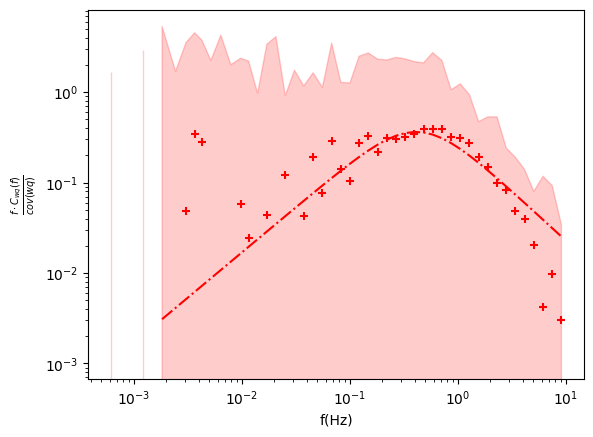

In [19]:
fig=plt.figure()
plot_spectre(T2R_1_30min['f_C_wh2o_norm'], color='r')
plot_Kansas_cospectra(T2R_1_30min['f_C_wh2o_norm'].mean('temps'),freq_min=3, color='r')
plt.xlabel('f(Hz)')
plt.ylabel(r"$\frac{f\cdot C_{wq}(f)}{cov(wq)}$")
plt.savefig(repertoire_figures+"H2O_cospectra_T2R.png")

axis = None
axis = None
axis = None


C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


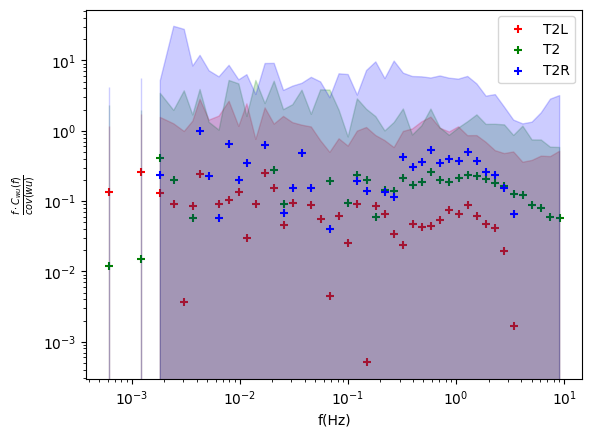

In [20]:
fig=plt.figure()
plot_spectre(T2L_1_30min['f_C_wu_norm'], color='r',label='T2L')
plot_spectre(T2_1_30min['f_C_wu_norm'], color='g',label='T2')
plot_spectre(T2R_1_30min['f_C_wu_norm'], color='b',label='T2R')
plt.xlabel('f(Hz)')
plt.ylabel(r"$\frac{f\cdot C_{wu}(f)}{cov(wu)}$")
plt.legend()

Text(0, 0.5, 'vFD(T2)')

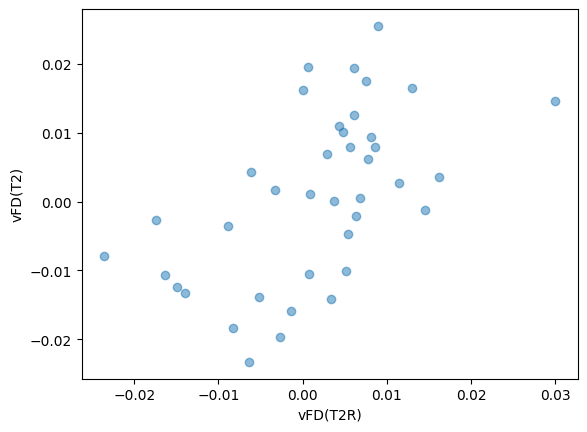

In [21]:
def vFD(level_1,level_2,var):
    return (level_2[var]-level_1[var])/(level_2['instrument_height']-level_1['instrument_height'])


fig=plt.figure()
plt.scatter(vFD(T2R_1_K,T2R_2_K,'wts_cov').values, vFD(T2_1_K,T2_2_K,'wts_cov').values,alpha=0.5)
plt.xlabel(r"vFD(T2R)")
plt.ylabel(r"vFD(T2)")


appel wq
zq 1e-05
appel u_s()
z0 0.001


Text(0, 0.5, '$\\frac{z}{z_{max}}$')

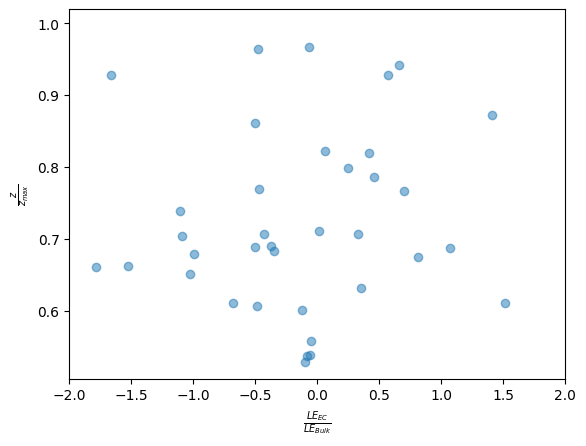

In [22]:
import Bulk

LE_Bulk=Bulk.LE_bulk(T2R_1_K)
fig=plt.figure()
plt.scatter(T2R_1_K['LE'].values/LE_Bulk.values,
            T2R_1_K['instrument_height'].values/zmax_T2R['z_max'].values,
            alpha=0.5)
plt.xlim(-2,2)
plt.xlabel(r"$\frac{LE_{EC}}{LE_{Bulk}}$")
plt.ylabel(r"$\frac{z}{z_{max}}$")

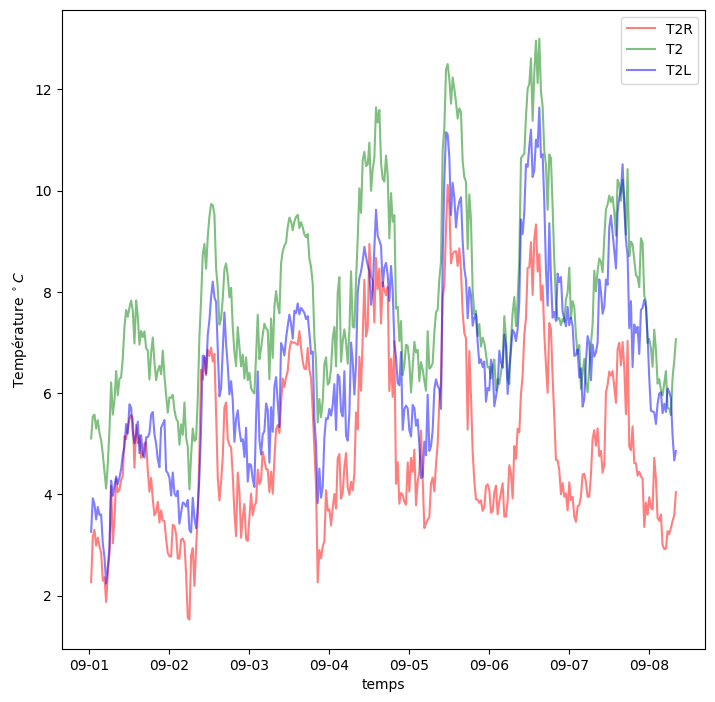

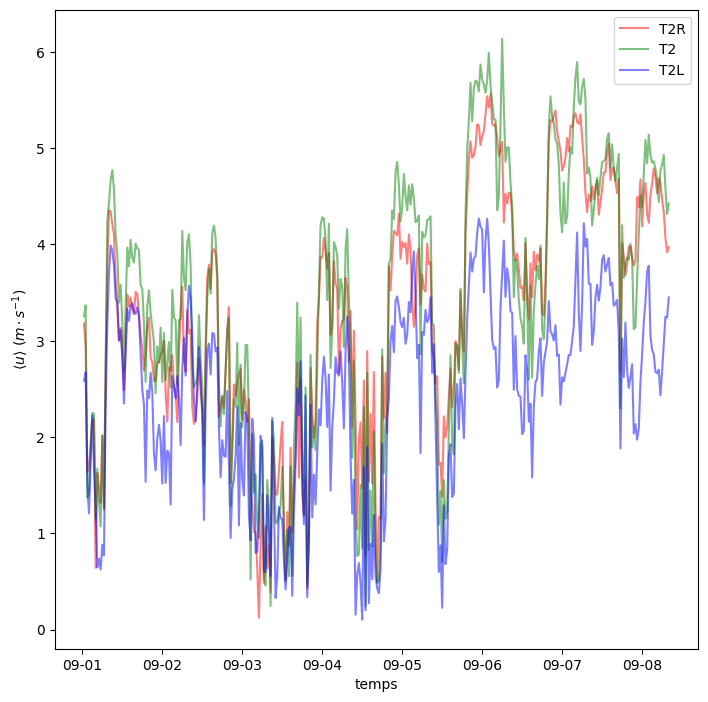

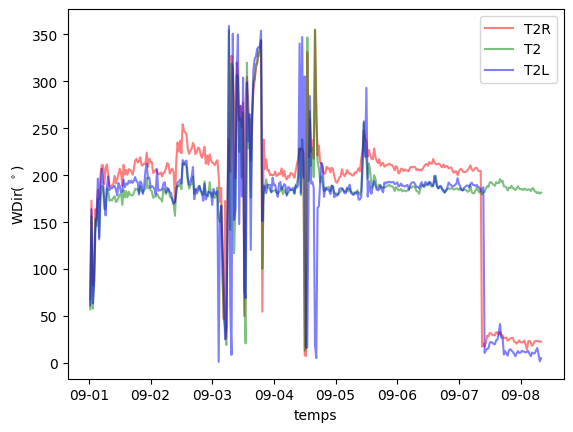

In [23]:
fig=plt.figure(figsize=(8.3,8.3))
date_format=mpl.dates.DateFormatter("%m-%d")
ax = fig.add_subplot(111)

ax.plot(T2R_1_30min.coords['temps'].values,T2R_1_30min['air_temperature']-273.15,color='r',alpha=0.5, label='T2R')
ax.plot(T2_1_30min.coords['temps'].values,T2_1_30min['air_temperature']-273.15,color='g',alpha=0.5, label='T2')
ax.plot(T2L_1_30min.coords['temps'].values,T2L_1_30min['air_temperature']-273.15,color='b',alpha=0.5, label='T2L')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel("temps")
ax.set_ylabel(r"Température $^\circ C$")
ax.legend()
plt.savefig(repertoire_figures+"evolution_T_all.png")

date_format=mpl.dates.DateFormatter("%m-%d")
fig=plt.figure(figsize=(8.3,8.3))
ax = fig.add_subplot(111)

ax.plot(T2R_1_30min.coords['temps'].values,T2R_1_30min['u_rot'],color='r',alpha=0.5, label='T2R')
ax.plot(T2_1_30min.coords['temps'].values,T2_1_30min['u_rot'],color='g',alpha=0.5, label='T2')
ax.plot(T2L_1_30min.coords['temps'].values,T2L_1_30min['u_rot'],color='b',alpha=0.5, label='T2L')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel("temps")
ax.set_ylabel(r"$\langle u \rangle$ ($m\cdot s^{-1}$)")
ax.legend()
plt.savefig(repertoire_figures+"evolution_u_all.png")
fig=plt.figure()
date_format=mpl.dates.DateFormatter("%m-%d")
ax = fig.add_subplot(111)

ax.plot(T2R_1_30min.coords['temps'].values,T2R_1_30min['wind_dir'],color='r',alpha=0.5, label='T2R')
ax.plot(T2_1_30min.coords['temps'].values,T2_1_30min['wind_dir'],color='g',alpha=0.5, label='T2')
ax.plot(T2L_1_30min.coords['temps'].values,T2L_1_30min['wind_dir'],color='b',alpha=0.5, label='T2L')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel("temps")
ax.set_ylabel(r"WDir( $^\circ$)")
ax.legend()

C:\Users\evanl\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


axis = None


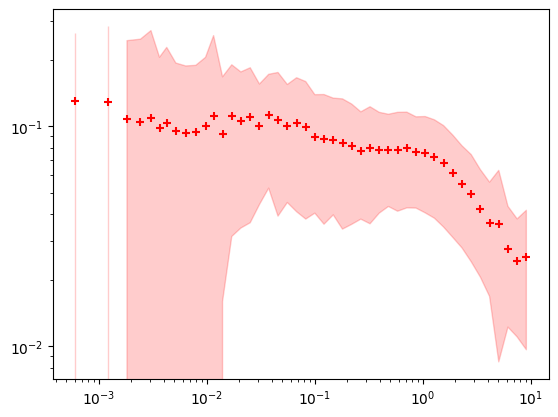

In [24]:
fig=plt.figure()
plot_spectre(T2R_1_K['f_Sh2o_norm'],color='r')

C:\Users\evanl\AppData\Local\Temp\ipykernel_35400\1735972248.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(z/z0)+4.7*z


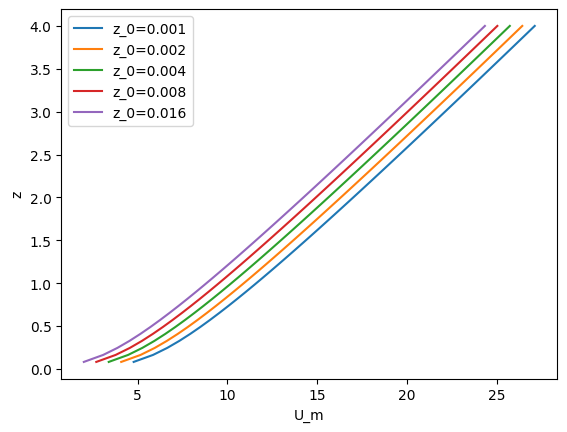

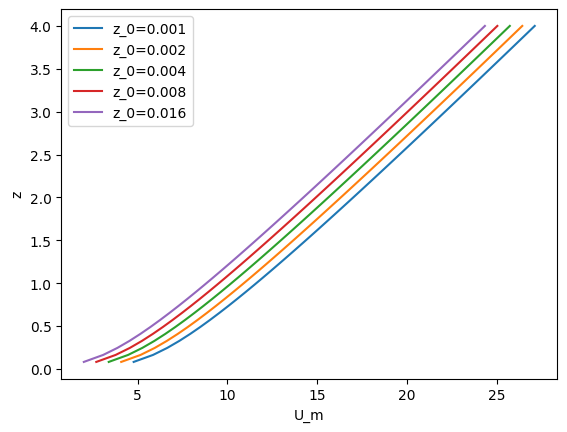

In [25]:
def U_m(z,z0):
    return np.log(z/z0)+4.7*z

z=np.linspace(0,4)
z_0=np.array([0.001,0.002,0.004,0.008,0.016])
fig=plt.figure()
for x in z_0:
    plt.plot(U_m(z,x),z, label="z_0={}".format(np.round(x,3)))
plt.xlabel("U_m")
plt.ylabel("z")
plt.legend()

fig=plt.figure()
for x in z_0:
    plt.plot(U_m(z,x),z, label="z_0={}".format(np.round(x,3)))
plt.xlabel("U_m")
plt.ylabel("z")
plt.legend()

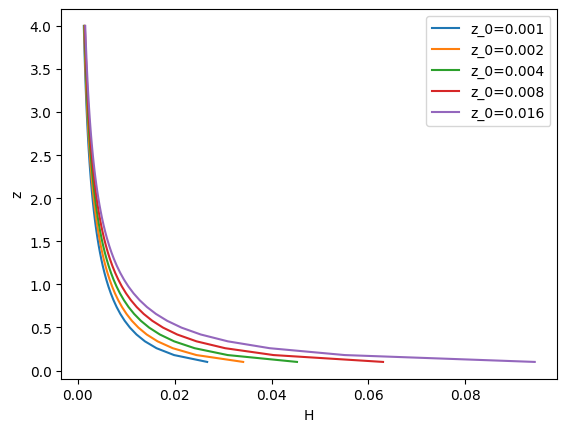

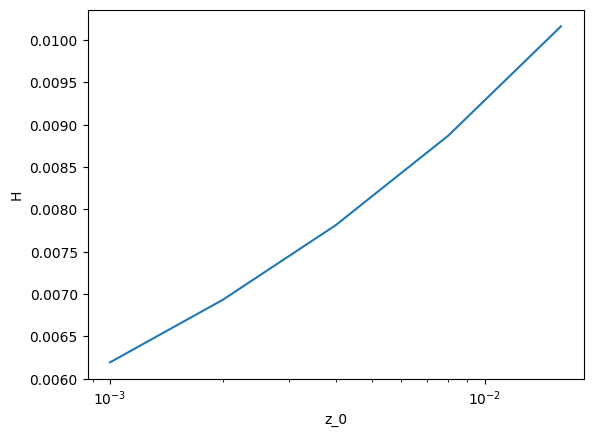

In [26]:
def H(z,z0,zt):
    return 1.0/((np.log(z/z0)+4.7*z)*(np.log(z/zt)+4.7*z))

z=np.linspace(0.1,4)
z_0=np.array([0.001,0.002,0.004,0.008,0.016])
z_t=z_0/10
fig=plt.figure()
for i in range(0,z_0.size):
    plt.plot(H(z,z_0[i],z_t[i]),z, label="z_0={}".format(np.round(z_0[i],3)))
plt.xlabel("H")
plt.ylabel("z")
plt.legend()

fig=plt.figure()
plt.plot(z_0,[H(1.0,z_0[i],z_t[i]) for i in range(0,z_0.size)])
plt.ylabel("H")
plt.xlabel("z_0")
plt.xscale('log')

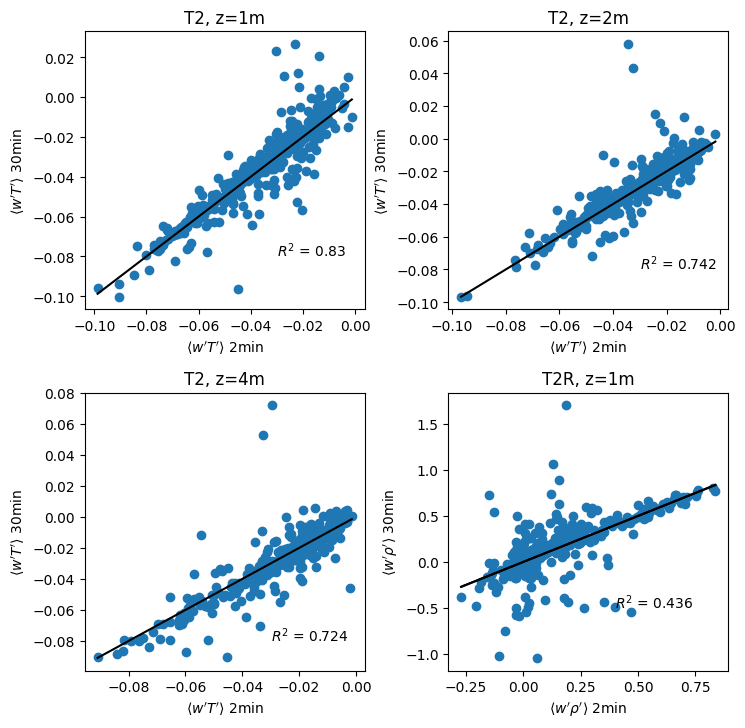

In [27]:
fig=plt.figure(figsize=(8.3,8.3))
fig.subplots_adjust(hspace=0.3,wspace=0.3)
ax1=fig.add_subplot(221)
plt.title("T2, z=1m")
plt.scatter(T2_1_2min_moy['wts_cov'].values,T2_1_30min['wts_cov'].values)
plt.xlabel(r"$\langle w'T'\rangle$ 2min")
plt.ylabel(r"$\langle w'T'\rangle$ 30min")
slope_1(T2_1_2min_moy['wts_cov'].values,color='k')
plt.text(-0.03,-0.08,r"$R^2$ = {}".format(np.around(R_2(T2_1_2min_moy['wts_cov'].values,T2_1_30min['wts_cov'].values),3)))
                                                   
ax2=fig.add_subplot(222)
plt.title("T2, z=2m")
plt.scatter(T2_2_2min_moy['wts_cov'].values,T2_2_30min['wts_cov'].values)
plt.xlabel(r"$\langle w'T'\rangle$ 2min")
plt.ylabel(r"$\langle w'T'\rangle$ 30min")
slope_1(T2_2_2min_moy['wts_cov'].values,color='k')
plt.text(-0.03,-0.08,r"$R^2$ = {}".format(np.around(R_2(T2_2_2min_moy['wts_cov'].values,T2_2_30min['wts_cov'].values),3)))


ax3=fig.add_subplot(223)
plt.title("T2, z=4m")
plt.scatter(T2_3_2min_moy['wts_cov'].values,T2_3_30min['wts_cov'].values)
plt.xlabel(r"$\langle w'T'\rangle$ 2min")
plt.ylabel(r"$\langle w'T'\rangle$ 30min")
slope_1(T2_3_2min_moy['wts_cov'].values,color='k')
plt.text(-0.03,-0.08,r"$R^2$ = {}".format(np.around(R_2(T2_3_2min_moy['wts_cov'].values,T2_3_30min['wts_cov'].values),3)))

ax4=fig.add_subplot(224)
plt.title("T2R, z=1m")
plt.scatter(T2R_1_2min_moy['wh2o_cov'].values,T2R_1_30min['wh2o_cov'].values)
slope_1(T2R_1_2min_moy['wh2o_cov'].values,color='k')
plt.xlabel(r"$\langle w'\rho'\rangle$ 2min")
plt.ylabel(r"$\langle w'\rho'\rangle$ 30min")
slope_1(T2R_1_2min_moy['wh2o_cov'].values,color='k')
plt.text(0.4,-0.5,r"$R^2$ = {}".format(np.around(R_2(T2R_1_2min_moy['wh2o_cov'].values,T2R_1_30min['wh2o_cov'].values),3)))
plt.savefig(repertoire_figures+"flux_2min_vs_30min.png")

In [28]:
import Bulk

print("T2 1m")
print(f"RMSE : {Bulk.RMSE(T2_1_2min_moy['wts_cov'].values,T2_1_30min['wts_cov'].values)}")
print(f"MBE : {Bulk.MBE(T2_1_2min_moy['wts_cov'].values,T2_1_30min['wts_cov'].values)}")

print("T2 2m")
print(f"RMSE : {Bulk.RMSE(T2_2_2min_moy['wts_cov'].values,T2_2_30min['wts_cov'].values)}")
print(f"MBE : {Bulk.MBE(T2_2_2min_moy['wts_cov'].values,T2_2_30min['wts_cov'].values)}")

print("T2 4m")
print(f"RMSE : {Bulk.RMSE(T2_3_2min_moy['wts_cov'].values,T2_3_30min['wts_cov'].values)}")
print(f"MBE : {Bulk.MBE(T2_3_2min_moy['wts_cov'].values,T2_3_30min['wts_cov'].values)}")

print("T2R 1m")
print(f"RMSE : {Bulk.RMSE(T2R_1_2min_moy['wh2o_cov'].values,T2R_1_30min['wh2o_cov'].values)}")
print(f"MBE : {Bulk.MBE(T2R_1_2min_moy['wh2o_cov'].values,T2R_1_30min['wh2o_cov'].values)}")

T2 1m
RMSE : 0.009350820850072234
MBE : -0.0006953067154672619
T2 2m
RMSE : 0.00967156763573013
MBE : -0.002065841651916396
T2 4m
RMSE : 0.011079708325769417
MBE : 0.000669789411584686
T2R 1m
RMSE : 0.23099466546950426
MBE : -0.004561150237568852


appel wT
zt 0.0001
appel u_s()
z0 0.001
appel wT
zt 0.0001
appel u_s()
z0 0.001
appel wT
zt 0.0001
appel u_s()
z0 0.001
appel wq
zq 0.0001
appel u_s()
z0 0.001


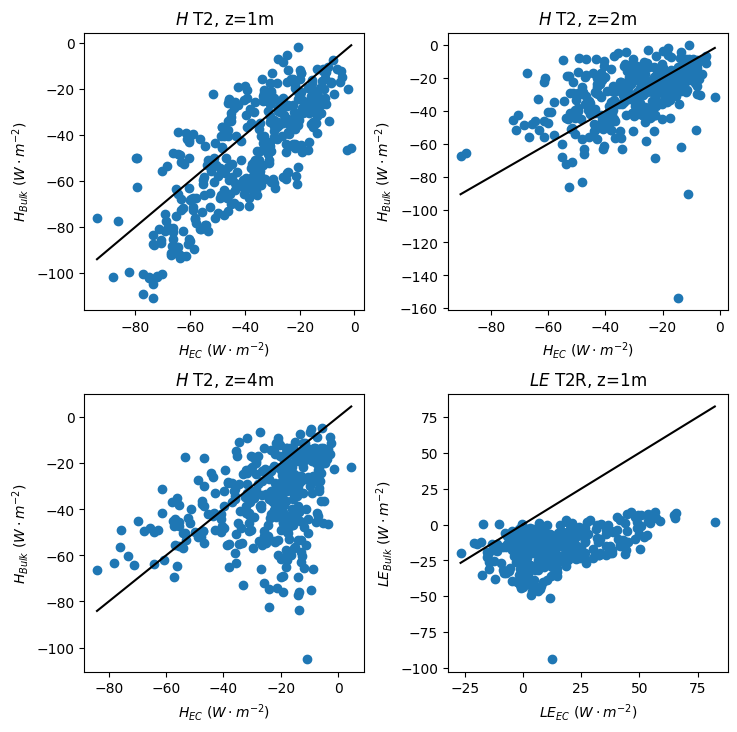

In [31]:
z_0=0.001#m
z_t=z_q=1.0e-1*z_0


H_Bulk_1=Bulk.H_bulk(T2_1_2min_moy,z0=z_0,zt=z_t).values

H_Bulk_2=Bulk.H_bulk(T2_2_2min_moy,z0=z_0,zt=z_t).values

H_Bulk_3=Bulk.H_bulk(T2_3_2min_moy,z0=z_0,zt=z_t).values

LE_Bulk_1=Bulk.LE_bulk(T2R_1_2min_moy,z0=z_0,zq=z_q).values

fig=plt.figure(figsize=(8.3,8.3))
fig.subplots_adjust(hspace=0.3,wspace=0.3)
ax1=fig.add_subplot(221)
plt.title("$H$ T2, z=1m")
plt.scatter(T2_1_2min_moy['H'].values,H_Bulk_1)
plt.xlabel(r"$H_{EC}$ ($W\cdot m^{-2}$)")
plt.ylabel(r"$H_{Bulk}$ ($W\cdot m^{-2}$)")
slope_1(T2_1_2min_moy['H'].values,color='k')

                                                   
ax2=fig.add_subplot(222)
plt.title("$H$ T2, z=2m")
plt.scatter(T2_2_2min_moy['H'].values,H_Bulk_2)
plt.xlabel(r"$H_{EC}$ ($W\cdot m^{-2}$)")
plt.ylabel(r"$H_{Bulk}$ ($W\cdot m^{-2}$)")
slope_1(T2_2_2min_moy['H'].values,color='k')



ax3=fig.add_subplot(223)
plt.title("$H$ T2, z=4m")
plt.scatter(T2_3_2min_moy['H'].values,H_Bulk_3)
plt.xlabel(r"$H_{EC}$ ($W\cdot m^{-2}$)")
plt.ylabel(r"$H_{Bulk}$ ($W\cdot m^{-2}$)")
slope_1(T2_3_2min_moy['H'].values,color='k')


ax4=fig.add_subplot(224)
plt.title("$LE$ T2R, z=1m")
plt.scatter(T2R_1_2min_moy['LE'].values,LE_Bulk_1)
slope_1(T2R_1_2min_moy['wh2o_cov'].values,color='k')
plt.xlabel(r"$LE_{EC}$ ($W\cdot m^{-2}$)")
plt.ylabel(r"$LE_{Bulk}$ ($W\cdot m^{-2}$)")
slope_1(T2R_1_2min_moy['LE'].values,color='k')
plt.savefig(repertoire_figures+"flux_Bulk_VS_EC.png")

In [30]:
print("T2 niveau 1")
print(Bulk.texte(H_Bulk_1,T2_1_2min_moy['H']))
print(f"RMSE_norm {Bulk.RMSE_norm(H_Bulk_1,T2_1_2min_moy['H'].values)} ")
print(f"abs_MBE {Bulk.abs_MBE(H_Bulk_1,T2_1_2min_moy['H'].values)} W/m^2 ")
print("T2 niveau 2")
print(Bulk.texte(H_Bulk_2,T2_2_2min_moy['H']))
print(f"RMSE_norm {Bulk.RMSE_norm(H_Bulk_2,T2_2_2min_moy['H'].values)} ")
print(f"abs_MBE {Bulk.abs_MBE(H_Bulk_2,T2_2_2min_moy['H'].values)} W/m^2 ")
print("T2 niveau 3")
print(Bulk.texte(H_Bulk_3,T2_3_2min_moy['H']))
print(f"RMSE_norm {Bulk.RMSE_norm(H_Bulk_3,T2_3_2min_moy['H'].values)} ")
print(f"abs_MBE {Bulk.abs_MBE(H_Bulk_3,T2_3_2min_moy['H'].values)} W/m^2 ")
print("T2R niveau 1")
print(Bulk.texte(LE_Bulk_1,T2R_1_2min_moy['LE']))
print(f"RMSE_norm {Bulk.RMSE_norm(LE_Bulk_1,T2R_1_2min_moy['LE'].values)} ")
print(f"abs_MBE {Bulk.abs_MBE(LE_Bulk_1,T2R_1_2min_moy['LE'].values)} W/m^2 ")

T2 niveau 1
$R^2$ = 0.598
MBE = -8.886 W/m^2
MRBE = 64.694 %
RMSE = 17.453 W/m^2
RMSE_norm 0.9040209572390372 
abs_MBE 14.838991905117298 W/m^2 
T2 niveau 2
$R^2$ = 0.183
MBE = 0.505 W/m^2
MRBE = 55.628 %
RMSE = 17.455 W/m^2
RMSE_norm 1.1098256552525283 
abs_MBE 12.38331123988692 W/m^2 
T2 niveau 3
$R^2$ = 0.112
MBE = -10.933 W/m^2
MRBE = 116.694 %
RMSE = 22.036 W/m^2
RMSE_norm 1.3636806191405566 
abs_MBE 16.5595807998308 W/m^2 
T2R niveau 1
$R^2$ = 0.180
MBE = -29.419 W/m^2
MRBE = 758.861 %
RMSE = 34.008 W/m^2
RMSE_norm 1.8947512505165114 
abs_MBE 29.75006439324777 W/m^2 
